In [1]:
import numpy as np
import pandas as pd

In [48]:
import sklearn
from sklearn import preprocessing
from sklearn import svm
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
train = pd.read_csv("train.csv")
test_raw = pd.read_csv("test.csv")
test = test_raw
train_raw = train

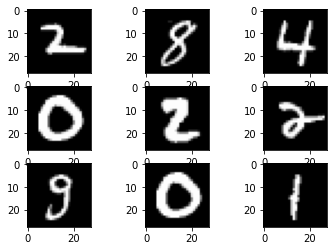

In [66]:
for i in range(9):
    k = random.randint(1, 50)
    img = np.asarray(train.iloc[k,1:].values.reshape((28,28))/255)
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    plt.imshow(img, cmap='gray')
    
plt.show()

In [64]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
train_y = train["label"]
train_x = train.drop(labels = ["label"], axis = 1)

train_x = train_x / 255.0
test = test / 255.0

train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

train_y = pd.get_dummies(train_y)


In [37]:
test_raw

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
model = keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [27]:
early_stopping =  keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model_result = model.fit(train_x, train_y, batch_size=32, epochs=100, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
1050/1050 [==============================] - 88s 73ms/step - loss: 0.2050 - accuracy: 0.9360 - val_loss: 0.0716 - val_accuracy: 0.9795
Epoch 2/100
1050/1050 [==============================] - 32s 30ms/step - loss: 0.1281 - accuracy: 0.9627 - val_loss: 0.0608 - val_accuracy: 0.9802
Epoch 3/100
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1200 - accuracy: 0.9651 - val_loss: 0.0652 - val_accuracy: 0.9808
Epoch 4/100
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1104 - accuracy: 0.9682 - val_loss: 0.0560 - val_accuracy: 0.9835
Epoch 5/100
1050/1050 [==============================] - 32s 31ms/step - loss: 0.1103 - accuracy: 0.9679 - val_loss: 0.0579 - val_accuracy: 0.9843
Epoch 6/100
1050/1050 [==============================] - 33s 32ms/step - loss: 0.1031 - accuracy: 0.9702 - val_loss: 0.0646 - val_accuracy: 0.9817
Epoch 7/100
1050/1050 [==============================] - 35s 33ms/step - loss: 0.1131 - accuracy: 0.9702 - val_loss: 0

In [14]:
model_clf = svm.SVC(C=10, kernel='rbf', gamma=0.01)
model_clf.fit(train_x, train_y)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [30]:
preds = model.predict(test)
preds = np.argmax(preds,axis = 1)

In [35]:
resultado = pd.DataFrame({'Id imagen': test.index+1,
                       'Label': preds})

In [36]:
resultado

,Id imagen,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


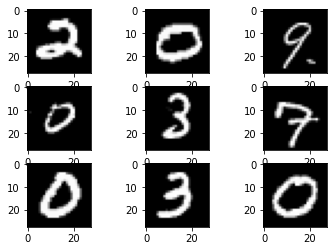

In [73]:
for i in range(9):
    img = np.asarray(test_raw.iloc[i].values.reshape((28,28))/255);
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    plt.imshow(img, cmap='gray')
    
plt.show()

In [72]:
test_raw.iloc[i]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 8, Length: 784, dtype: int64

In [71]:
test_raw

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
